***
<h1>Classification - Naive Bayes / KNN / SVM - Heart Attack Analysis</h1>
<p>
The Dataset I have chosen is the Twitter Sentiment Analysis dataset, taken from the UCI Machine Learning Repository
    <ul>
        <li>This Dataset essentially contains multiple columns</li>
        <li>age</li>
        <li>sex</li>
        <li>cp</li>
        <li>trtbps</li>
        <li>chol</li>
        <li>fbs</li>
        <li>restecg</li>
        <li>thalachh</li>
        <li>exng</li>
        <li>oldpeak</li>
        <li>slp</li>
        <li>caa</li>
        <li>thall</li>
        <li>output</li>
    </ul>
<a href='https://archive.ics.uci.edu/ml/datasets/heart+disease'>https://archive.ics.uci.edu/ml/datasets/heart+disease</a>
<br>
The target variable itself set up as a boolean - 1 = Will suffer from heart attacks and 0 = Will NOT suffer from heart attacks - making this dataset prime for Binary Classification
</p>

***

## Table of Contents:
* [Imports](#imports)
* [Exploratory Data Analysis + Cleaning](#EDA)
* [PreProcess + Splitting the data](#pre)
* [Training + Compiling + Evaluating the Naive Bayes Gaussian model](#gau)
* [Training + Compiling + Evaluating the Naive Bayes Bernoulli model](#bre)
* [Training + Compiling + Evaluating the KNeughbrClassifer (KNN) model](#knn)
* [Training + Compiling + Evaluating the Support Vector Machine (SVM) model](#svm)
* [Inferencing](#inf)

***

## Imports <a id="imports"></a>

In [1]:
# for data manipulation
import numpy as np
import pandas as pd

In [2]:
# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

In [3]:
# For data training/testing spliting and cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [4]:
# Importing preprocessing scalers, composer and pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [5]:
# Since I will be performing a Binary Classifcation models 
# I will need the following metrics to evaluate it's performance
# classification_report will display the a report with it's Precision and Recall score (will explain those concepts deeper into the Notebook) 
# confusion_matrix will display the matrix of the model performed with it's predictions, this will be done by displaying it's True Negative, True Positive, False Negative and False Positive predicitons
# accuracy_score will display the overall accuracy of the current model
# roc_curve will be used to display the Received Operator Characteristic chart
# roc_auc_score will be used to calculate and display the Area Under the Curve unit
# Importing the various metrics needed to evaluate the models I will be using

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [6]:
# For this Binary Classification, I will build three models 
# Naive Bayes Models (all three types - Gaussian, Categorical and Bernoulli)
# KNeighbors Classification (KNN)
# Support Vector Model (SVM Classifer to be specific)

#Reasonings are explain deeper in the Notebook

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

In [7]:
# As means of testing the final model with real data, I will also use joblib to perform a final test
import joblib

In [8]:
from IPython.display import display, HTML

***

## Exploratory Data Analysis + Cleaning <a class="anchor" id="EDA"></a>

In [9]:
# First I create a url variable that will contain the url of the dataset, this way you should be able to run the code on your own machine
# The dataset is living in a github I have created for my datasets

url = "https://raw.githubusercontent.com/CleverJinn/DataScience/main/Datasets/heart.csv"
df = pd.read_csv(url)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<p>
    <ol>
        <li>Age : Age of the patient</li>
        <br>
        <li>Sex : Sex of the patient<ul><li>1 = male</li><li> 0 = female</li></ul></li>
        <br>
        <li>exang: exercise induced angina<ul><li>1 = yes</li><li>0 = no</li></ul></li>
        <br>
        <li>caa: number of major vessels<ul><li>3</li><li>2</li><li>1</li><li>0</li></ul></li>
        <br>
        <li>cp : Chest Pain type chest pain type<ul><li>3 = asymptomatic</li><li>2 = non-anginal pain</li><li>1 = atypical angina</li><li>0 = typical angina</li></ul></li>
        <br>
        <li>trtbps : resting blood pressure (in mm Hg)</li>
        <br>
        <li>chol : cholestoral in mg/dl fetched via BMI sensor</li>
        <br>
        <li>fbs : (fasting blood sugar > 120 mg/dl)<ul><li>1 = true</li><li>0 = false</li></ul></li>
        <br>
        <li>rest_ecg : resting electrocardiographic results<ul><li>2 = showing probable or definite left ventricular hypertrophy by Estes' criteria</li><li>1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)</li><li> 0 = normal</li></ul></li>
        <nr>
        <li>thalach : maximum heart rate achieved</li>
        <br>
        <li>output (target)<ul><li>1 = more chance of heart attack</li><li> 0 = less chance of heart attack</li></ul></li>
    </ol>
    <br>
    By analyzing the data, this gives me the overall idea on what I am working with. I plan to use Binary Classification to predict output of whether a person will suffer from heart attacks or not. From the dataset we can we are dealing with majority arthimetic values with normalized categorical values. The only true categorical value to consider might be the age column, but further analyses will be done to verify. This is a very superficial examinination, so lets delve deeper
</p>

In [10]:
df.shape

(303, 14)

We can see there is a total 303 of data in the this dataset and 14 variables acting as the columns.

In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

<p>
Next I displayed the column names. This is purely for my benefit, so when I refer to columns I can copy the names from this cell, instead of risking syntax errors.
</p>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<p>
Next I used the info() function to tell me all the variables in the dataset and display the datatypes they represent. This confirms the cell before as we can see that there are indeed 14 columns. This also tells us all of their names and datatypes in a convenient format. I want all the int variables that will effect the expenese of the output variable
</p>

In [13]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


After that I used the describe function to display a description of the arithmetic values in the datasets

In [14]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<p>
Next is used the isnull() method on my dataframe to find any potential null values. I then run the sum() method along with it to count and give the total of any null values
</p>

<AxesSubplot:>

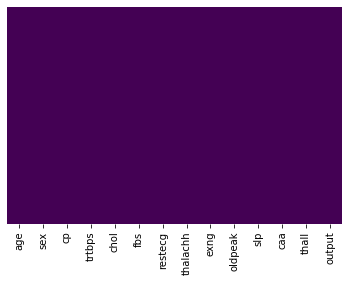

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

<p>
A visual way of checking is to the use the heatmap() function from Seaborn. I then add the dataframe setting it to display only isnull() values. Then I set the cmap to 'viridis' for my visual benefit. The purple image will indicate values being detected. Any yellow tints will indicate any null values being detected.
<br><br>
Fortunately the dataset I am using does not have null values, according to the heatmap, so now I can carry on.
</p>

In [16]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


Next is to check if values are being duplicated on the dataset

In [17]:
df.drop_duplicates(keep='first',inplace=True)

<p>
To drop the duplicated values, I used the drop_duplicates method
<br><br>
Next is to analyse the data using visualization. First created a HeartAttack_feature variable to hold all my feature names. Then I created a HeartAttack_label variable to hold the label name.
<br><br>
I then used a for loop to loop through feature to display a count plot. Reasoning for this is to indentify and understand the dominate values that contribute to potential heart attacks. For this to work I am only using the features with distinct values for the countplot analysis.
</p> 

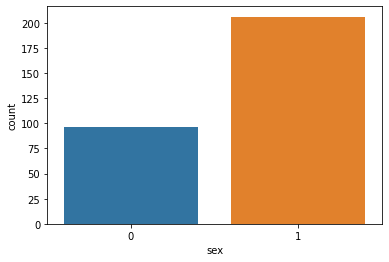

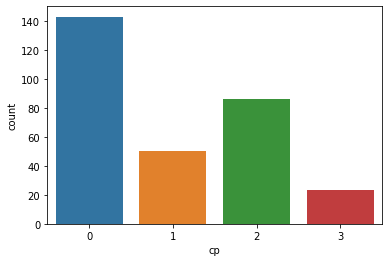

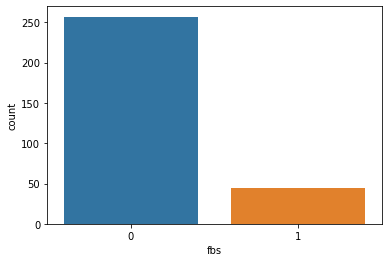

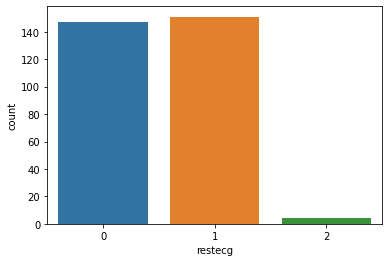

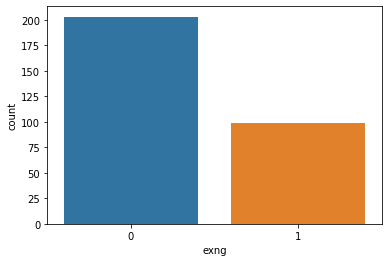

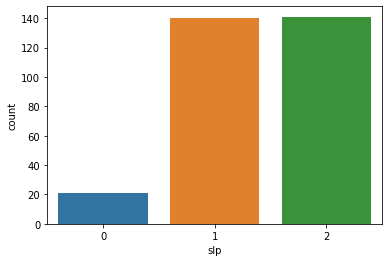

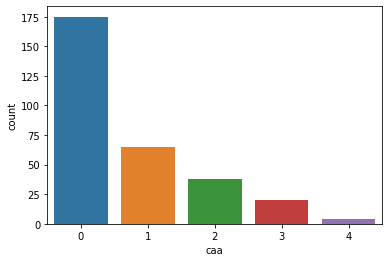

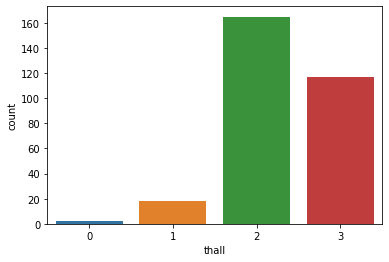

In [18]:
HeartAttack_feature = ['sex', 'cp','fbs', 'restecg','exng','slp', 'caa', 'thall']
HeartAttack_label = ['output']
for col in HeartAttack_feature:
    sns.countplot(data=df, x=col)
    plt.show()

<p>
Analyzing the graphs above we can deduce the dominate values 
<br><br>
<ul>
    <li>Graph 1 (sex) - Males (value 1) are mostly to be deduced with heart attacks</li>
    <br>
    <li>Graph 2 (cp) - Typical angina (value 0) are most correlated to heart attacks</li>
    <br>
    <li>Graph 3 (fbs) - People with Fasting Blood Suger below 120mg are more correlated to heart attacks</li>
    <br>
    <li>Graph 4 (restecg) - For resting electrocardiographic results, interesntly enough, normal (value 0) and having ST-T wave abnormality (value 1) being the highest, with value 1 slighlty taking the win, this gives the idea that the even normal restecg doesnt guarrentee no heart attacks</li>
    <br>
    <li>Graph 5 (exng) - For exercise induced angina, people with no induced agnina (value 0) ended up being the highest, also showing heart attacks are still possible</li>
    <br>
    <li>Graph 6 (caa) - With number of major vessels peolple with 0 (value 0) seems to be the most potential for heart attacks</li>
    <br>
    <li>Graph 7 (thall) - For thall rate value 2 ends up taking the most count for heart attacks</li>
</ul>
</p>

<p>
Now to visualize and analyse the the continous values. For this I decided to use the distribution graph. From there just like the previous cell I created a for loop, and loop through each continous feature value.
</p>

<Figure size 720x720 with 0 Axes>

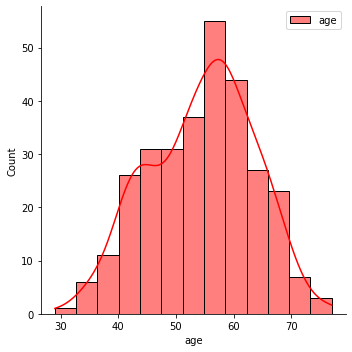

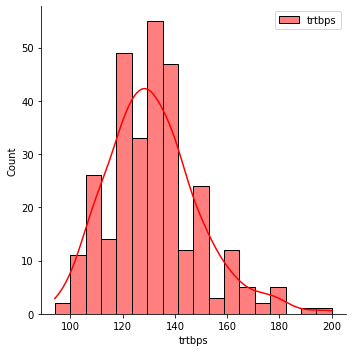

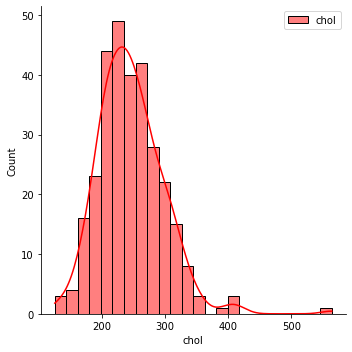

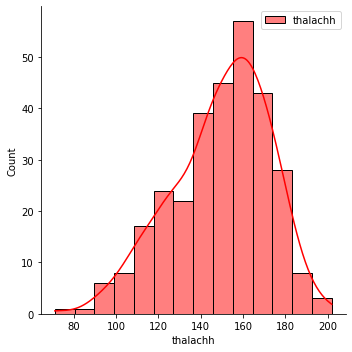

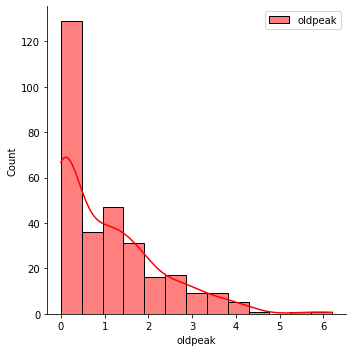

In [19]:
plt.figure(figsize=(10,10))
HeartAttack_feature = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
HeartAttack_label = ['output']
for col in HeartAttack_feature:
    sns.displot(df[col], color='red', label=col, kde=True)
    plt.legend()

<p>
For the area under the normal distribution curve represents probability and the total area under the curve sums to one. Most continuous data values in a normal distribution will cluster around the mean, therefore the closer the values are to the mean the most likely it will occur. For all continuous data features we can see they all breach well above the highest mean, indicating these features will be useful for the model.
</p>

<p>
One last point I needed to check was the age column, considering this will be see as a categorical variable. For this I decided to create a distribution graph, like before, but this time, track the distribution for when output is both "1" and "0"
</p>

c:\Users\Dylan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Dylan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


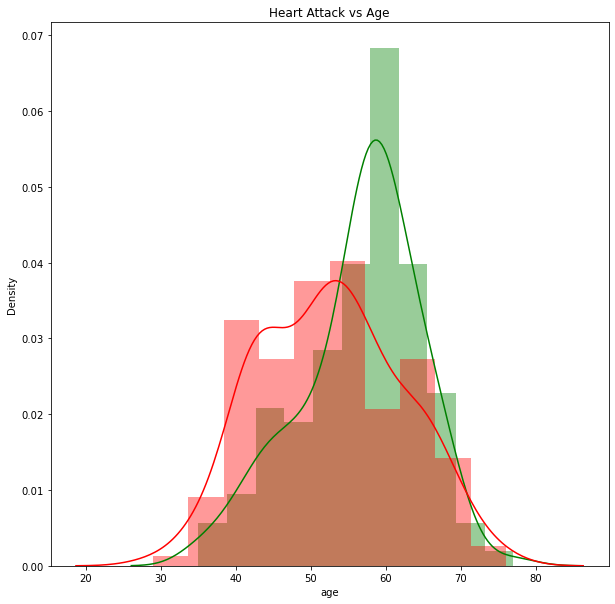

In [20]:
plt.figure(figsize=(10,10))
sns.distplot(df[df[HeartAttack_label[0]] == 0]['age'], color='green',kde=True)
sns.distplot(df[df[HeartAttack_label[0]] == 1]['age'], color='red',kde=True)
plt.title('Heart Attack vs Age')
plt.show()

<p>
By analyzing this double distribution graph we can the continuous values breach the highest mean for both dist graphs. This solidifies the reason to keep it for the models for now
</p>

In [21]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


Next is to check the overal correlation of all the columns in the dataframe

<AxesSubplot:>

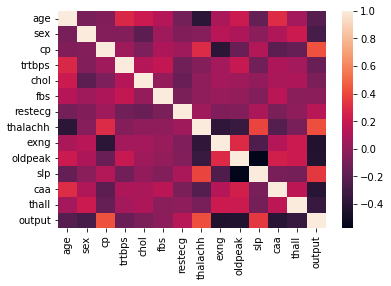

In [22]:
sns.heatmap(df.corr())

To make it visually more appealing to look at, I see the corr() to a seaborn heatmap

***

## PreProcess + Splitting the data <a class="anchor" id="pre"></a>

With the data clean and our values analyzed, I then started Train and Test process

In [23]:
# First is to store the target variable output in a variable named 'y'
y = df['output']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [24]:
# Then to store all my X values in a variable named 'X'
# Then used the head() function to display the values  to confirm they were stored correctly

X = df[['age','sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']]
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


<p>
From there I called the train_test_split function and fed it the X and y values I captured. Also set test_size to 0.2 and random_state to 0. Common split = Train: 80%/Test: 20%
</p>

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

In [26]:
# Next is to create the preprocess steps for my both my scaling and setting the process up for my Pipeline
# Define preprocessing for numeric columns (normalize them so they're on the same scale)

# For this I need a variable list to hold my feature columns and just a transformer variable to hold me pipeline step.
x_num_columns = [1,2,3,4,5,6,7,8,9,10,11,12]
x_num_transformer = Pipeline(steps=[
    ('scaler',StandardScaler())])
    
# Preprocessing steps 
preprocessor = ColumnTransformer(transformers=[('num', x_num_transformer, x_num_columns)])

<p>
For this cell, since I am performing a Naive Bayes model and there are different types. It makes sense to create a custom function that will perform a Naive Bays ML model where a parameter for model type will determine which type to create. The function will take the parameters of my test/train variables, as well as the type of naive bayes model we need
</p>  

In [27]:
def Naive_Bayes_func(X_train, X_test, y_train, y_test,type):
    
    # Training pipeline
    # Creating the Pipeline variable with the steps of preprocessing the data, then creating the Naive Bayes model
    # With the type of the model depepending on the variable named type 
    pipeline = Pipeline(steps=[('preprocessor',preprocessor),('Naive_Bayes', type)])
    
    # Afterwards is to fit the model with the training data
    # One is the clf fit, just to get the class_prior
    # The second is the actual model that will be used
    clf = type.fit(X_train,y_train)
    model = pipeline.fit(X_train,y_train)
    
    #Predict class labels on the test data
    prediction = model.predict(X_test)
    
    #Print model name 
    if str(type) == 'GaussianNB()':
        display(HTML("<h1>Gaussian Model</h1>"))
        
    elif str(type) == 'CategoricalNB()':
        display(HTML("<h1>Categorical Model</h1>"))
        
    elif str(type) == 'BernoulliNB()':
        display(HTML("<h1>Bernoulli Model</h1>"))
    
    print('Classes: ', clf.classes_) # class labels known to the classifier
    if str(type) == 'GaussianNB()':
        print('Class Priors: ', clf.class_prior_) # prior probability of each class
    else:
        print('Class Log Priors: ', clf.class_log_prior_) # log prior probability of each class.
    
    # Getting and printing model scores
    training_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    print('----------------------------------------------------------------')
    print('Accuracy Training Score: ', training_score)
    print('Accuracy Test Score: ', test_score)
    print("The Accuracy of the model is : ", accuracy_score(y_test, prediction)*100, "%")
    print('----------------------------------------------------------------')
    
    # Look at classification report to evaluate the model
    print(classification_report(y_test,prediction))
    
    #Return the relevant data for visualization
    return X_train,X_test,y_train,y_test, model, prediction

<p>
Afterwards that I decided to create a custom function for my Confusion Matrix Graph and my ROC Curve Graph. Since these graphs are going to be used for my evaluation for all the classification models in this Notebook. Makes senses to have them as functions to call, rather than repeating code.
</p>

In [28]:
# This function is serving as the Confusion Matrix Graph
# This will be needed for the evaluation of the graphs
# The function will take the y_test values and the prediciton value calculated in the model creation

def Confusion_Matrix_Graph(y_test,prediction):
    
    cm = confusion_matrix(y_test,prediction)
    plt.subplots(figsize=(18, 6))
    sns.heatmap(cm/np.sum(cm), annot= True, fmt='.2%', cmap='Blues')

In [29]:
# This function is serving as the ROC Curve Graph
# This will be needed for the evaluation of the graphs
# The function will take the X_test and y_test as parameters

def ROC_Curve_Graph(X_test,y_test,model):
    
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.subplots(figsize=(18, 6))
    plt.plot(fpr,tpr,label="Prediction, auc="+str(auc))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.legend(loc=4)
    plt.show()

***

## Training + Compiling + Evaluating the Naive Bayes Gaussian model <a class="anchor" id="gau"></a>

In [30]:
# Creating a Naive Bayes model with GaussianNB() set as type
# Fit the model and print the result
# Capture the values for graphs
X_train, X_test, y_train, y_test, model, prediction = Naive_Bayes_func(X_train, X_test, y_train, y_test, GaussianNB())

Classes:  [0 1]
Class Priors:  [0.46058091 0.53941909]
----------------------------------------------------------------
Accuracy Training Score:  0.8381742738589212
Accuracy Test Score:  0.8852459016393442
The Accuracy of the model is :  88.52459016393442 %
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



<p>
With the model above is then created, I then used HTML to print the Model type and a printed a report with the model results.
<br><br>
Lets examine the report
<ul>
    <li>Classes: represents the labels used in this model, in this case it is the y values (1 = Yes and 0 = No)</li>
    <li>Class Priors : represents the prior probability of each class value (since the dataset is key to training the model, knowing the class prior is something to keep track of)</li>
</ul>
<br>
Accuracy Training and Test Score : represents how well the model peformed with the presented training and test data. Not only are these useful for accuracy tracking of the model, they also tell us if we are over or under fitting. Since both values are respectively high, this is a good sign that the model is doing well.
<br><br>
The overall accuracy of the model : basically lets us know how accurate the model is.
<br><br>
NOTE: Just examining the accuracy is not enough, which is why the next step is to analyze the classification report. For the classifcation report we are given 4 metrics to examine.
<ul>
    <li>Precision: Of the predictions the model made for this class, what proportion were correct</li>
    <li>Recall: Out of all of the instances of this class in the test dataset, how many did the model identify</li>
    <li>F1-Score: An average metric that takes both precision and recall into account</li>
    <li>Support: How many instances of this class are there in the test dataset</li>
</ul>
<br>
While all 4 are important, for classification the 2 I wish to focus on is Precision and Recall. For Precision having high metrics will ensure that the model is correct in its true predicitions. For Recall this assures us that the model is reading and identifying the dataset correctly. It is possible to have a high Precision and Low Recall (which would be bad, but since both are high, this means the model is performing well) 
</p>

<p>
All in all, according to this report the Gaussian model is looking good. However it would be too simplistic and easy to just trust the report. The next step is to create a Confusion Matrix graph to analyze the True and False predictions
</p>

In [31]:
# Then I created another dataframe df2 to present how the Actual test data looks compared to the predicted data

df2 = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
df2

,Actual,Predicted
226,0,0
152,1,1
229,0,0
202,0,0
52,1,0
...,...,...
146,1,1
302,0,1
26,1,1
108,1,1


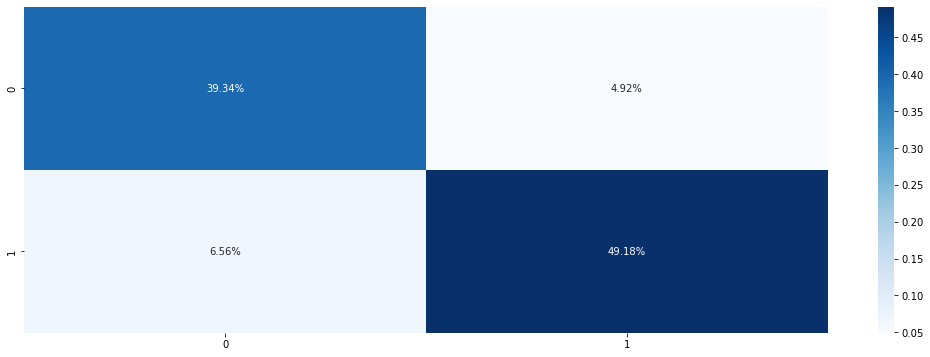

In [32]:
# For the Confusion Matrix Graph I will be using the function I created earlier
# All I need is the y_test and prediction values are parameters

Confusion_Matrix_Graph(y_test,prediction)

<p>
In order to obtain the most accurate model, I want the true positive and false positive predictions to be the highest values. This will tell us whenever the model predicted the output to be 1 = Yes and 0 = No, it was majority of the time correct. For the case of the graph, I also have legend indicating the value amounts. So for the case of the analysis if the false predictions are above the second element (that being 10, starting from the bottom). Then the accuracy cannot be trusted. However for the case of this graph, the false predictions are below the first element (that being 5, starting from the bottom). This tells the the model is as accurate as it can be for Gaussian model
</p>

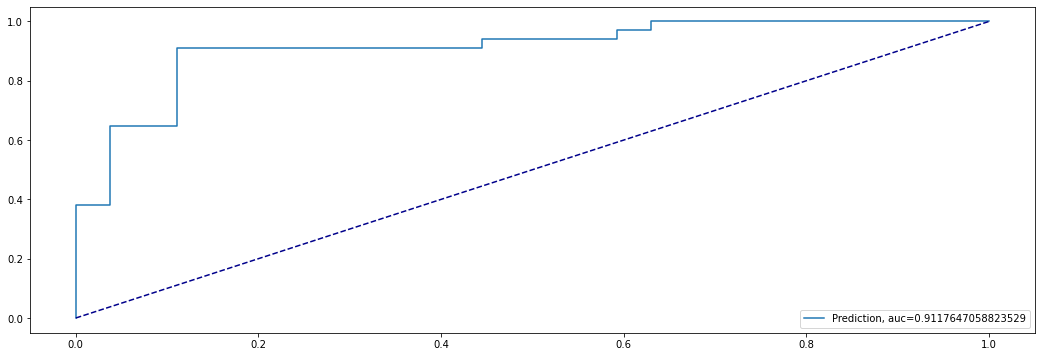

In [33]:
# With the Confusion Matrix Graph done, the next step for evaluation is to graph out a Received Operator Characteristic (ROC) curve graph
# The logic, is with the Confusion Matrix Graph helped in making sure our Postivie predictions were high than Negative
# The ROC Curve graph will also aid in analyzing the difference between the Positive predictions
# I will also calculate the Area Under the Curve value (AUC)

# For this I will be using the ROC_Curve_Graph function I created earlier 
# The only parameters I will need will be the X_test and y_test values

ROC_Curve_Graph(X_test,y_test,model)

<p>
The ROC chart shows the curve of the true and false positive rates for different values between 0 and 1. A perfect classifier would have a curve that goes straight up the left side and straight across the top. The diagonal line across the char represents the probability of predicting correctly with a 50/50 random prediciton. Therefore I want the curve to be higher and more distant from the diagonal line. Because it basically confirms that the model is certainly positive of it's predictions with no guessing 
<br><br>
Another point the graph will be doing is calculating the AUC. The Area Under the Curve (AUC) is a value between 0 and 1 that quantifies the overall performance of the model.
<br>
For this graph AUC = 0.91
<br>
Very close to 1, so for all intents and purposes I can conclude that this model performs quite well
<br><br>
The only noticeable critisim I can point out for this graph is how rigid some of the points are, instead of a more natural curve. This can be a result of Naive Bayes making it's assumption of the features.
</p>

In [34]:
# Finally one last thing is to obtain the cross validation score metrics
# This will tell use the estimate performance of the model 
# I can then obtain the mean and the standard deviation of the model performance

scores = cross_val_score(model, X, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.82 accuracy with a standard deviation of 0.06


We can see the mean accuracy is 82% and the standard deviation is 6%

<p>
So, Recap of the Gaussian Model.
<ul>
    <li>Accuracy Training Score: 83.81%</li>
    <li>Accuracy Test Score: 88.52%</li>
    <li>The Accuracy of the model is : 88.52%</li>
</ul>
<ul>
    <li>Precision[0]: 86%</li>
    <li>Precision[1]: 91%</li>
    <br>
    <li>Recall[0]: 89%</li>
    <li>Recall[1]: 88%</li>
</ul>
Both True Positive and False Positive were the highest point in the Confusion Matrix Graph.
<br>
AUC = 0.91
<ul>
    <li>Mean of Accuracy = 82%</li>
    <li>Standard Deviation = 6%</li>
</ul>
<br>
Gaussian has perform quite well all things considered. However due to Naive Bayes reliance on assuming the independence of the features. Peforming another Naive Bayes models should be done in order to get a better picture
</p>

***

## Training + Compiling + Evaluating the Naive Bayes Bernoulli model <a class="anchor" id="bre"></a>

In [35]:
# Creating a Naive Bayes model with BernoulliNB() set as type
# Fit the model and print the result
# Capture the values for graphs

# Reason for Bernoulli is due to the fact that this is a Binary Classification
# Bernoulli is built with the intent of there being only two possible outcome (basically Binary Classification)
# So while Gaussian gave us good metircs and handled the data well
# Bernoulli might give us a better picture of the metrics since it is built for this outcome

X_train, X_test, y_train, y_test, model, prediction = Naive_Bayes_func(X_train, X_test, y_train, y_test, BernoulliNB())

Classes:  [0 1]
Class Log Priors:  [-0.77526673 -0.61726248]
----------------------------------------------------------------
Accuracy Training Score:  0.8464730290456431
Accuracy Test Score:  0.8688524590163934
The Accuracy of the model is :  86.88524590163934 %
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [36]:
# Then I created another dataframe df2 to present how the Actual test data looks compared to the predicted data
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
df2

,Actual,Predicted
226,0,0
152,1,1
229,0,0
202,0,0
52,1,0
...,...,...
146,1,1
302,0,1
26,1,1
108,1,1


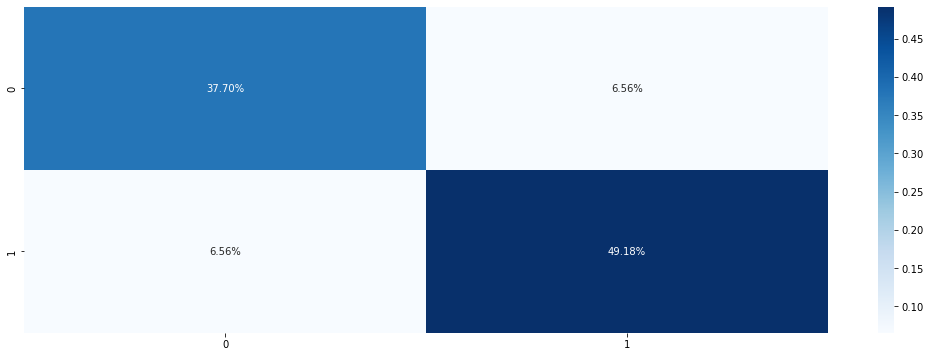

In [37]:
# For the Confusion Matrix Graph I will be using the function I created earlier
# All I need is the y_test and prediction values are parameters
Confusion_Matrix_Graph(y_test,prediction)

<p>
For the case of the graph, I also have legend indicating the value amounts. So for the case of the analysis if the false predictions are above the second element (that being 10, starting from the bottom). Then the accuracy cannot be trusted. However for the case of this graph, the false predictions are below the first element (that being 5, starting from the bottom)
<br><br>
This tells the the model is as accurate as it can be for Bernoulli model
</p>

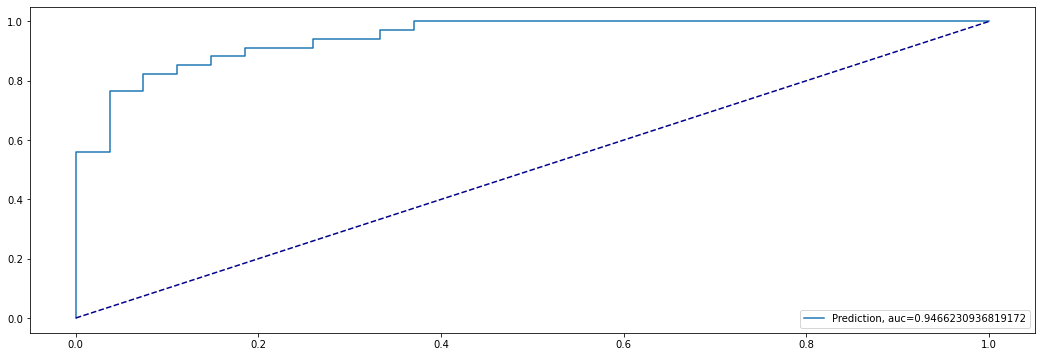

In [38]:
# With the Confusion Matrix Graph done, the next step for evaluation is to graph out a Received Operator Characteristic (ROC) curve graph
# I will also calculate the Area Under the Curve value (AUC)

# For this I will be using the ROC_Curve_Graph function I created earlier 
# The only parameters I will need will be the X_test and y_test values

ROC_Curve_Graph(X_test,y_test,model)

<p>
For this graph AUC = 0.946
<br>
Very close to 1, so for all intents and purposes I can conclude that this model performs quite well. The only noticeable critisim (again) I can point out for this graph is how rigid some of the points are, instead of a more natural curve. This can be a result of Naive Bayes making it's assumption of the features
</p>

In [39]:
# Finally one last thing is to obtain the cross validation score metrics
# This will tell use the estimate performance of the model 
# I can then obtain the mean and the standard deviation of the model performance

scores = cross_val_score(model, X, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.84 accuracy with a standard deviation of 0.03


We can see the mean accuracy is 84% and the standard deviation is 3%

<p>
So, Recap of the Bernoulli Model.
<ul>
    <li>Accuracy Training Score: 84.64%</li>
    <li>Accuracy Test Score: 86.88%</li>
    <li>The Accuracy of the model is : 86.88%</li>
</ul>
<ul>
    <li>Precision[0]: 85%</li>
    <li>Precision[1]: 88%</li>
    <br>
    <li>Recall[0]: 85%</li>
    <li>Recall[1]: 88%</li>
</ul>
Both True Positive and False Positive were the highest point in the Confusion Matrix Graph.
<br>
AUC = 0.94
<ul>
    <li>Mean of Accuracy = 84%</li>
    <li>Standard Deviation = 3%</li>
</ul>
<br>
Compared to Gaussian though, for Bernoulli, while there is a small dip with Prcision and Recall.
</p>

***

## Training + Compiling + Evaluating the KNeughbrClassifer (KNN) model <a class="anchor" id="knn"></a>

<p>
The next model I will build will be a KNeighborsClassifier. With this model I will be able to control the k-nearest neighbors the model will build itself. I will then able to whittle it down to the best accuracy
</p>

BEST K VALUE:  7.000000
----------------------------------------------------------------
Accuracy Training Score:  0.8381742738589212
Accuracy Test Score:  0.9016393442622951
The Accuracy of the model is :  90.1639344262295 %
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        27
           1       0.94      0.88      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



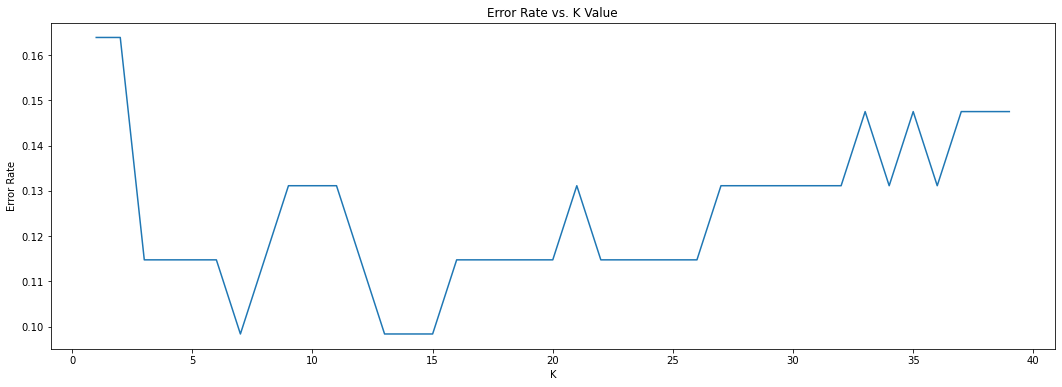

In [41]:
# for loop to fetch the error rate and find the best k value

error_rate = [] # This list will hold the error rate values

# Loop 40 times for each potential neighbor (40 attempts seems fair, anything higher will just mean KNN is not the best model to try)
for i in range(1,40):

    # Building the KNN model using my pipeline for scaling
    knn = Pipeline(steps=[('preprocessor',preprocessor),('KNN', KNeighborsClassifier(n_neighbors=i))])
    # Fitting the model with my training data and from there, getting my predictions
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Getting the best K-nearest value    
best_k = error_rate.index(min(error_rate))

# Visualizing the error rate vs the current k value
display(HTML("<h1>KNN Model</h1>"))
fig, ax = plt.subplots(figsize=(18, 6))
sns.lineplot(x=range(1,40), y=error_rate, ax=ax)
ax.set_ylabel('Error Rate')
ax.set_xlabel('K')
ax.set_title("Error Rate vs. K Value")


# Create the model with the best k-nearest value
knn = Pipeline(steps=[('preprocessor',preprocessor),
                               ('KNN', KNeighborsClassifier(n_neighbors = best_k + 1))])

model = knn.fit(X_train,y_train)
prediction = model.predict(X_test)

# Printing a report of the best K value and it's accuracy (Just like before)
print('BEST K VALUE:  {:2f}'.format(best_k + 1))
training_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)
print('----------------------------------------------------------------')
print('Accuracy Training Score: ', training_score)
print('Accuracy Test Score: ', test_score)
print("The Accuracy of the model is : ", accuracy_score(y_test, prediction)*100, "%")
print('----------------------------------------------------------------')
print(classification_report(y_test,prediction))
    

<p>
With the model above is then created, I then used HTML to print the Model type and a printed a report with the model results. Also used plotly to create a scatter graph to pinpoint and confirm the best k-nearest value
<br>
In this case k = 7 is the best
</p>

In [42]:
# Then I created another dataframe df2 to present how the Actual test data looks compared to the predicted data

df2 = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
df2

,Actual,Predicted
226,0,0
152,1,0
229,0,0
202,0,0
52,1,0
...,...,...
146,1,1
302,0,1
26,1,1
108,1,1


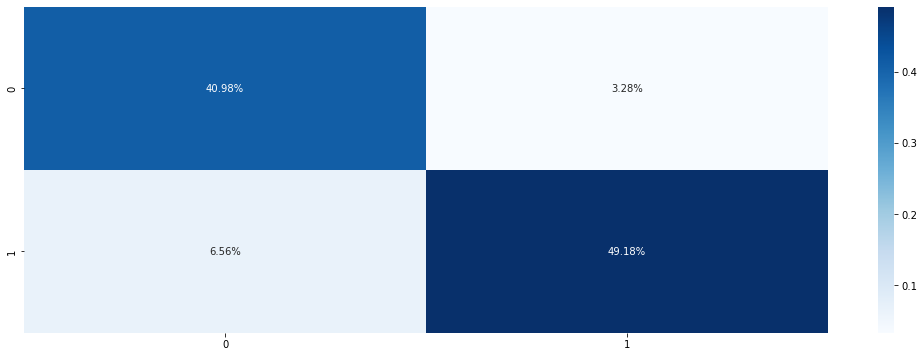

In [43]:
# For the Confusion Matrix Graph I will be using the function I created earlier
# All I need is the y_test and prediction values are parameters

Confusion_Matrix_Graph(y_test,prediction)

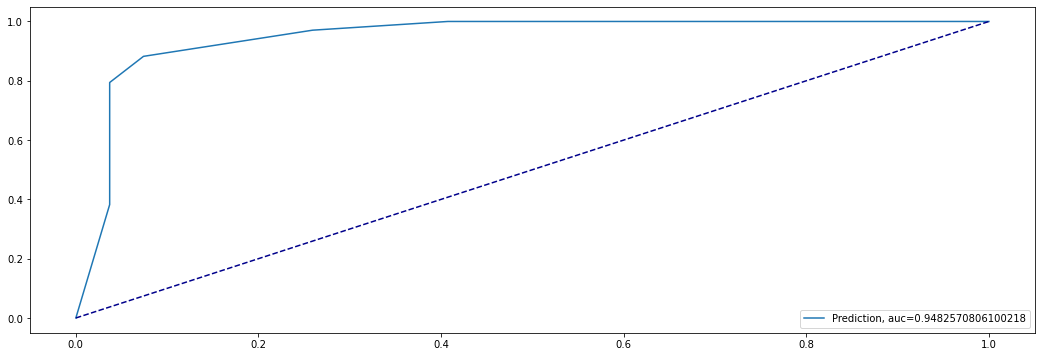

In [44]:
# With the Confusion Matrix Graph done, the next step for evaluation is to graph out a Received Operator Characteristic (ROC) curve graph
# The logic, is with the Confusion Matrix Graph helped in making sure our Postivie predictions were high than Negative
# The ROC Curve graph will also aid in analyzing the difference between the Positive predictions
# I will also calculate the Area Under the Curve value (AUC)

# For this I will be using the ROC_Curve_Graph function I created earlier 
# The only parameters I will need will be the X_test and y_test values

ROC_Curve_Graph(X_test,y_test,model)

<p>
For this graph AUC = 0.948
<br>
Very close to 1, so for all intents and purposes I can conclude that this model performs quite well. One benefit I am noticing with KNN is how the curve is much smoother and less rigid
</p>

In [45]:
# Finally one last thing is to obtain the cross validation score metrics
# This will tell the estimate performance of the model 
# I can then obtain the mean and the standard deviation of the model performance

scores = cross_val_score(model, X, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.82 accuracy with a standard deviation of 0.05


We can see the mean accuracy is 82% and the standard deviation is 5%

<p>
So, Recap of the KNN Model.
<ul>
    <li>Accuracy Training Score: 83.81%</li>
    <li>Accuracy Test Score: 90.16%</li>
    <li>The Accuracy of the model is : 90.16%</li>
</ul>
<ul>
    <li>Precision[0]: 86%</li>
    <li>Precision[1]: 94%</li>
    <br>
    <li>Recall[0]: 93%</li>
    <li>Recall[1]: 88%</li>
</ul>
Both True Positive and False Positive were the highest point in the Confusion Matrix Graph.
<br>
AUC = 0.948
<ul>
    <li>Mean of Accuracy = 82%</li>
    <li>Standard Deviation = 5%</li>
</ul>
<br>
KNN is flexiability helps out in tunning the model out even better than Naive Bayes assumptions
<br>
But I want to try one more ML model
</p>

***

## Training + Compiling + Evaluating the Support Vector Machine (SVM) model <a class="anchor" id="svm"></a>

<p>
Finally model I want to try is a Support Vector Machine (SVM) model. SVM works really well when the classes are well defined and well separated. Precisely like the current working dataset
</p>

In [46]:
# Fortunately creation of the SVM model will be a lot easier
# All I had to do was create the SVM model along with my pipeline for scaling

svc = Pipeline(steps=[('preprocessor',preprocessor),('SVC', SVC(probability=True))])
#Fit the training data
model = svc.fit(X_train, y_train)

# Use score method to get accuracy of the model
training_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)
prediction = model.predict(X_test)
display(HTML("<h1>Support Vector Machine Model</h1>"))
print('----------------------------------------------------------------')
print('Accuracy Training Score: ', training_score)
print('Accuracy Test Score: ', test_score)
print("The Accuracy of the model is : ", accuracy_score(y_test, prediction)*100, "%")
print('----------------------------------------------------------------')

# Look at classification report to evaluate the model
print(classification_report(y_test,prediction))

----------------------------------------------------------------
Accuracy Training Score:  0.9045643153526971
Accuracy Test Score:  0.9180327868852459
The Accuracy of the model is :  91.80327868852459 %
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        27
           1       0.94      0.91      0.93        34

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [47]:
# Then I created another dataframe df2 to present how the Actual test data looks compared to the predicted data

df2 = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
df2

,Actual,Predicted
226,0,0
152,1,0
229,0,0
202,0,0
52,1,0
...,...,...
146,1,1
302,0,1
26,1,1
108,1,1


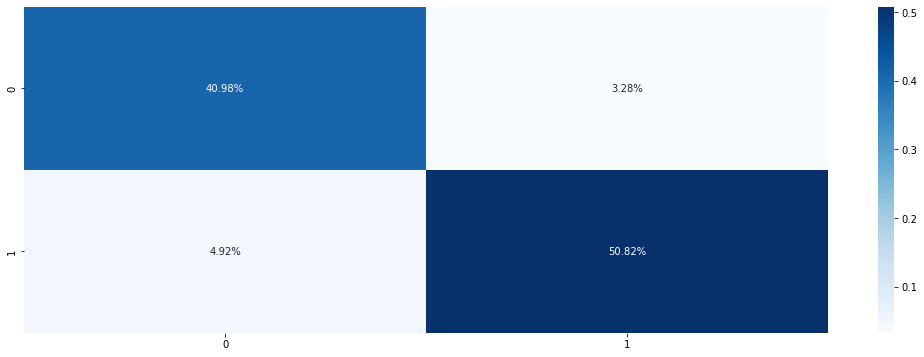

In [48]:
# For the Confusion Matrix Graph I will be using the function I created earlier
# All I need is the y_test and prediction values are parameters

Confusion_Matrix_Graph(y_test,prediction)

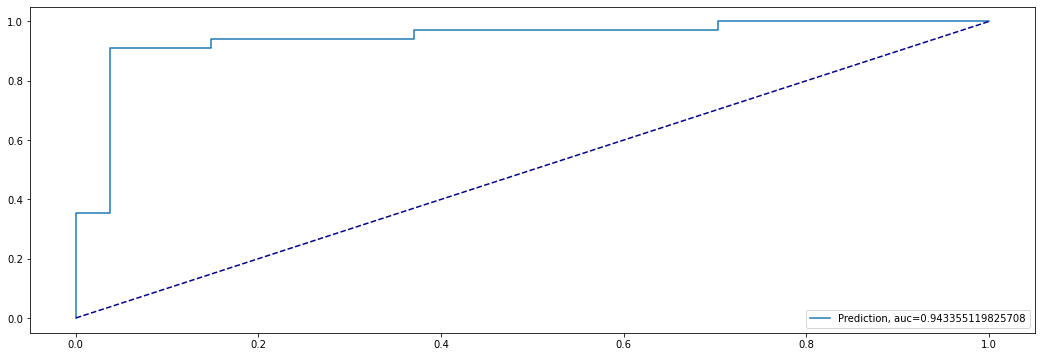

In [49]:
# The ROC Curve graph will also aid in analyzing the difference between the Positive predictions
# I will also calculate the Area Under the Curve value (AUC)

# For this I will be using the ROC_Curve_Graph function I created earlier 
# The only parameters I will need will be the X_test and y_test values

ROC_Curve_Graph(X_test,y_test,model)

<p>
For this graph AUC = 0.943
<br>
Very close to 1, so for all intents and purposes I can conclude that this model performs quite well.One benefit I am noticing with KNN is how the curve is much smoother and less rigid
</p>

In [50]:
# Finally one last thing is to obtain the cross validation score metrics
# This will tell the estimate performance of the model 
# I can then obtain the mean and the standard deviation of the model performance

scores = cross_val_score(model, X, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.84 accuracy with a standard deviation of 0.04


We can see the mean accuracy is 84% and the standard deviation is 4%

<p>
So, Recap of the SVM Model.
<ul>
    <li>Accuracy Training Score: 90.45%</li>
    <li>Accuracy Test Score: 91.80%</li>
    <li>The Accuracy of the model is : 91.80%</li>
</ul>
<ul>
    <li>Precision[0]: 89%</li>
    <li>Precision[1]: 94%</li>
    <br>
    <li>Recall[0]: 93%</li>
    <li>Recall[1]: 91%</li>
</ul>
Both True Positive and False Positive were the highest point in the Confusion Matrix Graph.
<br>
AUC = 0.948
<ul>
    <li>Mean of Accuracy = 84%</li>
    <li>Standard Deviation = 4%</li>
</ul>
<br>
SVM perfroms very well as well
<ul>
    <li>Extremly high training and test scores</li>
    <li>Extremly high accuracy score</li>
    <li>Extremly high AUC</li>
    <li>While the ROC is not as much of a curve as KNN</li>
    <li>The confusion Matrix out of all the other models, has the lowest false positive and false negative metrics</li>
</ul>
</p>


Therefore, for my conclusion, I will conclude that the SVM model is the best classifier for the current dataset

***

## Inferencing <a class="anchor" id="inf"></a>

<p>
As a final step, I will use the SVM model (the most accurate model I could use). I will use it for inferencing custom data values and retrive an output to tell how accurate the model can perform
</p>

In [51]:
# First Save the model as a pickle file
filename = './heartattack_model.pkl'
joblib.dump(model, filename)

['./heartattack_model.pkl']

In [52]:
# Load the model from the file
model = joblib.load(filename)

# predict on a new sample
# The model accepts an array of feature arrays (so you can predict the classes of multiple patients in a single call)
# Created an array with a single array of features, representing one patient
X_new = np.array([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])
print('New sample: {}'.format(list(X_new[0])))

# Gets a prediction
prediction = model.predict(X_new)

#IF statement to identifiy if a patient will have an heart attack or not
#HA = 1 - WILL have heart attack
#HA = 0 - WILL not have heart attack
if prediction[0] == 1:
    HA = "a Heart Attack"
elif prediction[0] == 0:
    HA = "NO Heart Attack"

# Returns an array of predictions - one for each set of features submitted
# Print out the prediction to test if the model is correct.
print('Prediction detects {}'.format(HA))

New sample: [63.0, 1.0, 3.0, 145.0, 233.0, 1.0, 0.0, 150.0, 0.0, 2.3, 0.0, 0.0, 1.0]
Prediction detects a Heart Attack


c:\Users\Dylan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


***